In [1]:
import warnings
import pandas as pd #進行數據處理的函式庫
import numpy as np #高階大量的維度陣列與矩陣運算
import matplotlib.pyplot as plt #處理資料視覺化的繪圖庫
import seaborn as sns #處理資料視覺化的繪圖庫
from sklearn.datasets import load_wine #採用 Sklearn 所提供的葡萄酒分類的資料集

# 1) 載入資料集

# 葡萄酒分類的資料集

In [2]:
wine = load_wine()
df_data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= ["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline","age"])
df_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,age
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


# 2) EDA (Exploratory Data Analysis) 探索式資料分析
主要概念是透過數據統計的方式視覺化資料。做EDA的好處可以從各種面向先了解資料的狀況，以利後續的模型分析。

#直方圖

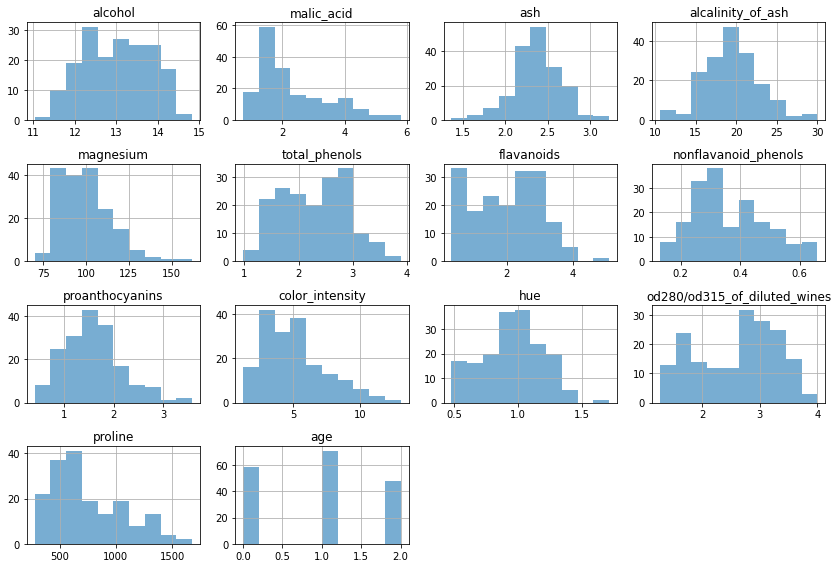

In [4]:
#直方圖 histograms
df_data.hist(alpha=0.6,layout=(4,4), figsize=(12, 8), bins=10)
plt.tight_layout()
plt.show()

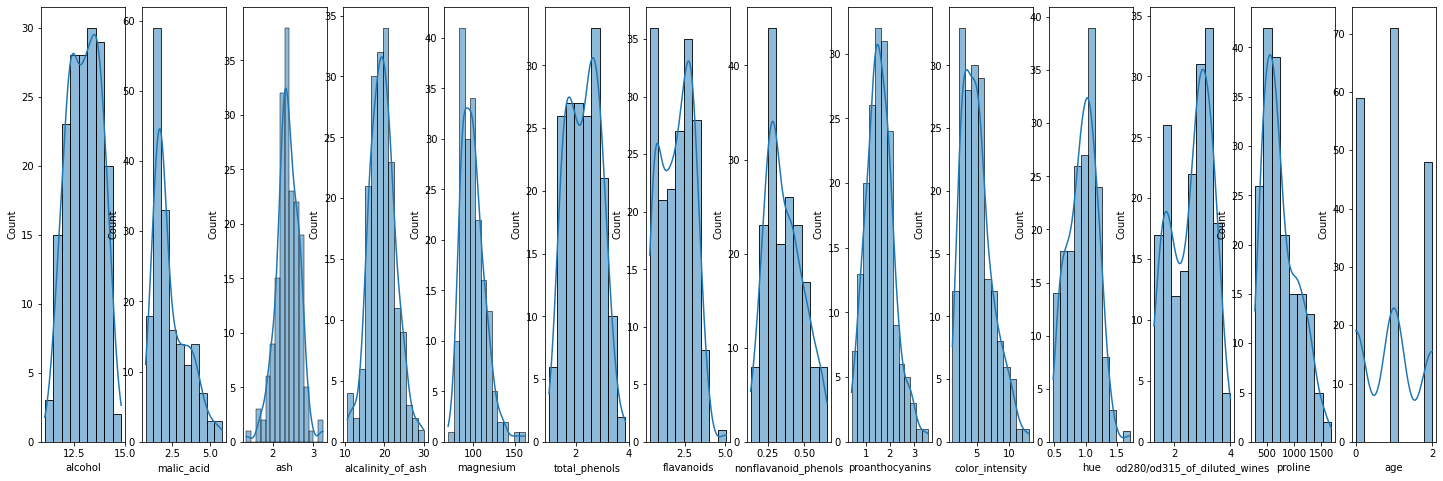

In [11]:
#kde=True 來查看每個特徵的分佈狀況
fig, axes = plt.subplots(nrows=1,ncols=14)
fig.set_size_inches(25, 8)
sns.histplot(df_data["alcohol"][:],ax=axes[0], kde=True)
sns.histplot(df_data["malic_acid"][:],ax=axes[1], kde=True)
sns.histplot(df_data["ash"][:],ax=axes[2], kde=True)
sns.histplot(df_data["alcalinity_of_ash"][:],ax=axes[3], kde=True)
sns.histplot(df_data["magnesium"][:],ax=axes[4], kde=True)
sns.histplot(df_data["total_phenols"][:],ax=axes[5], kde=True)
sns.histplot(df_data["flavanoids"][:],ax=axes[6], kde=True)
sns.histplot(df_data["nonflavanoid_phenols"][:],ax=axes[7], kde=True)
sns.histplot(df_data["proanthocyanins"][:],ax=axes[8], kde=True)
sns.histplot(df_data["color_intensity"][:],ax=axes[9], kde=True)
sns.histplot(df_data["hue"][:],ax=axes[10], kde=True)
sns.histplot(df_data["od280/od315_of_diluted_wines"][:],ax=axes[11], kde=True)
sns.histplot(df_data["proline"][:],ax=axes[12], kde=True)
sns.histplot(df_data["age"][:],ax=axes[13], kde=True)



# 核密度估計Kernel Density Estimation(KDE)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcca18c3dd0>,
      dtype=object)

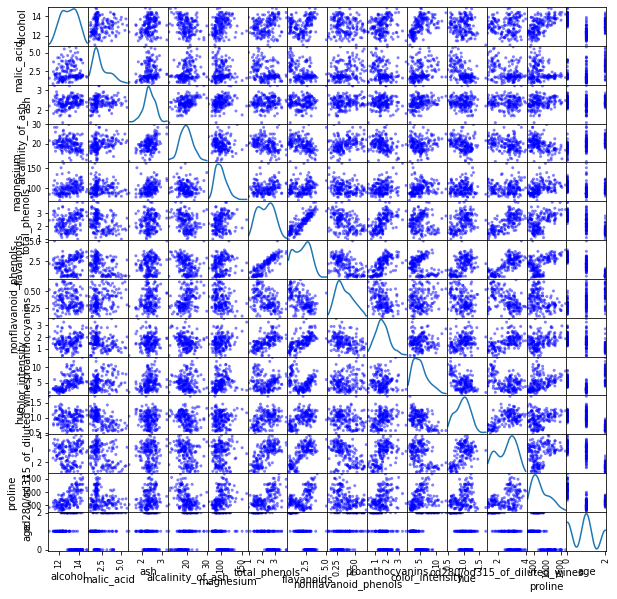

In [12]:
from pandas.plotting import scatter_matrix #使用 Pandas 繪製：
scatter_matrix( df_data,figsize=(10, 10),color='b',diagonal='kde')

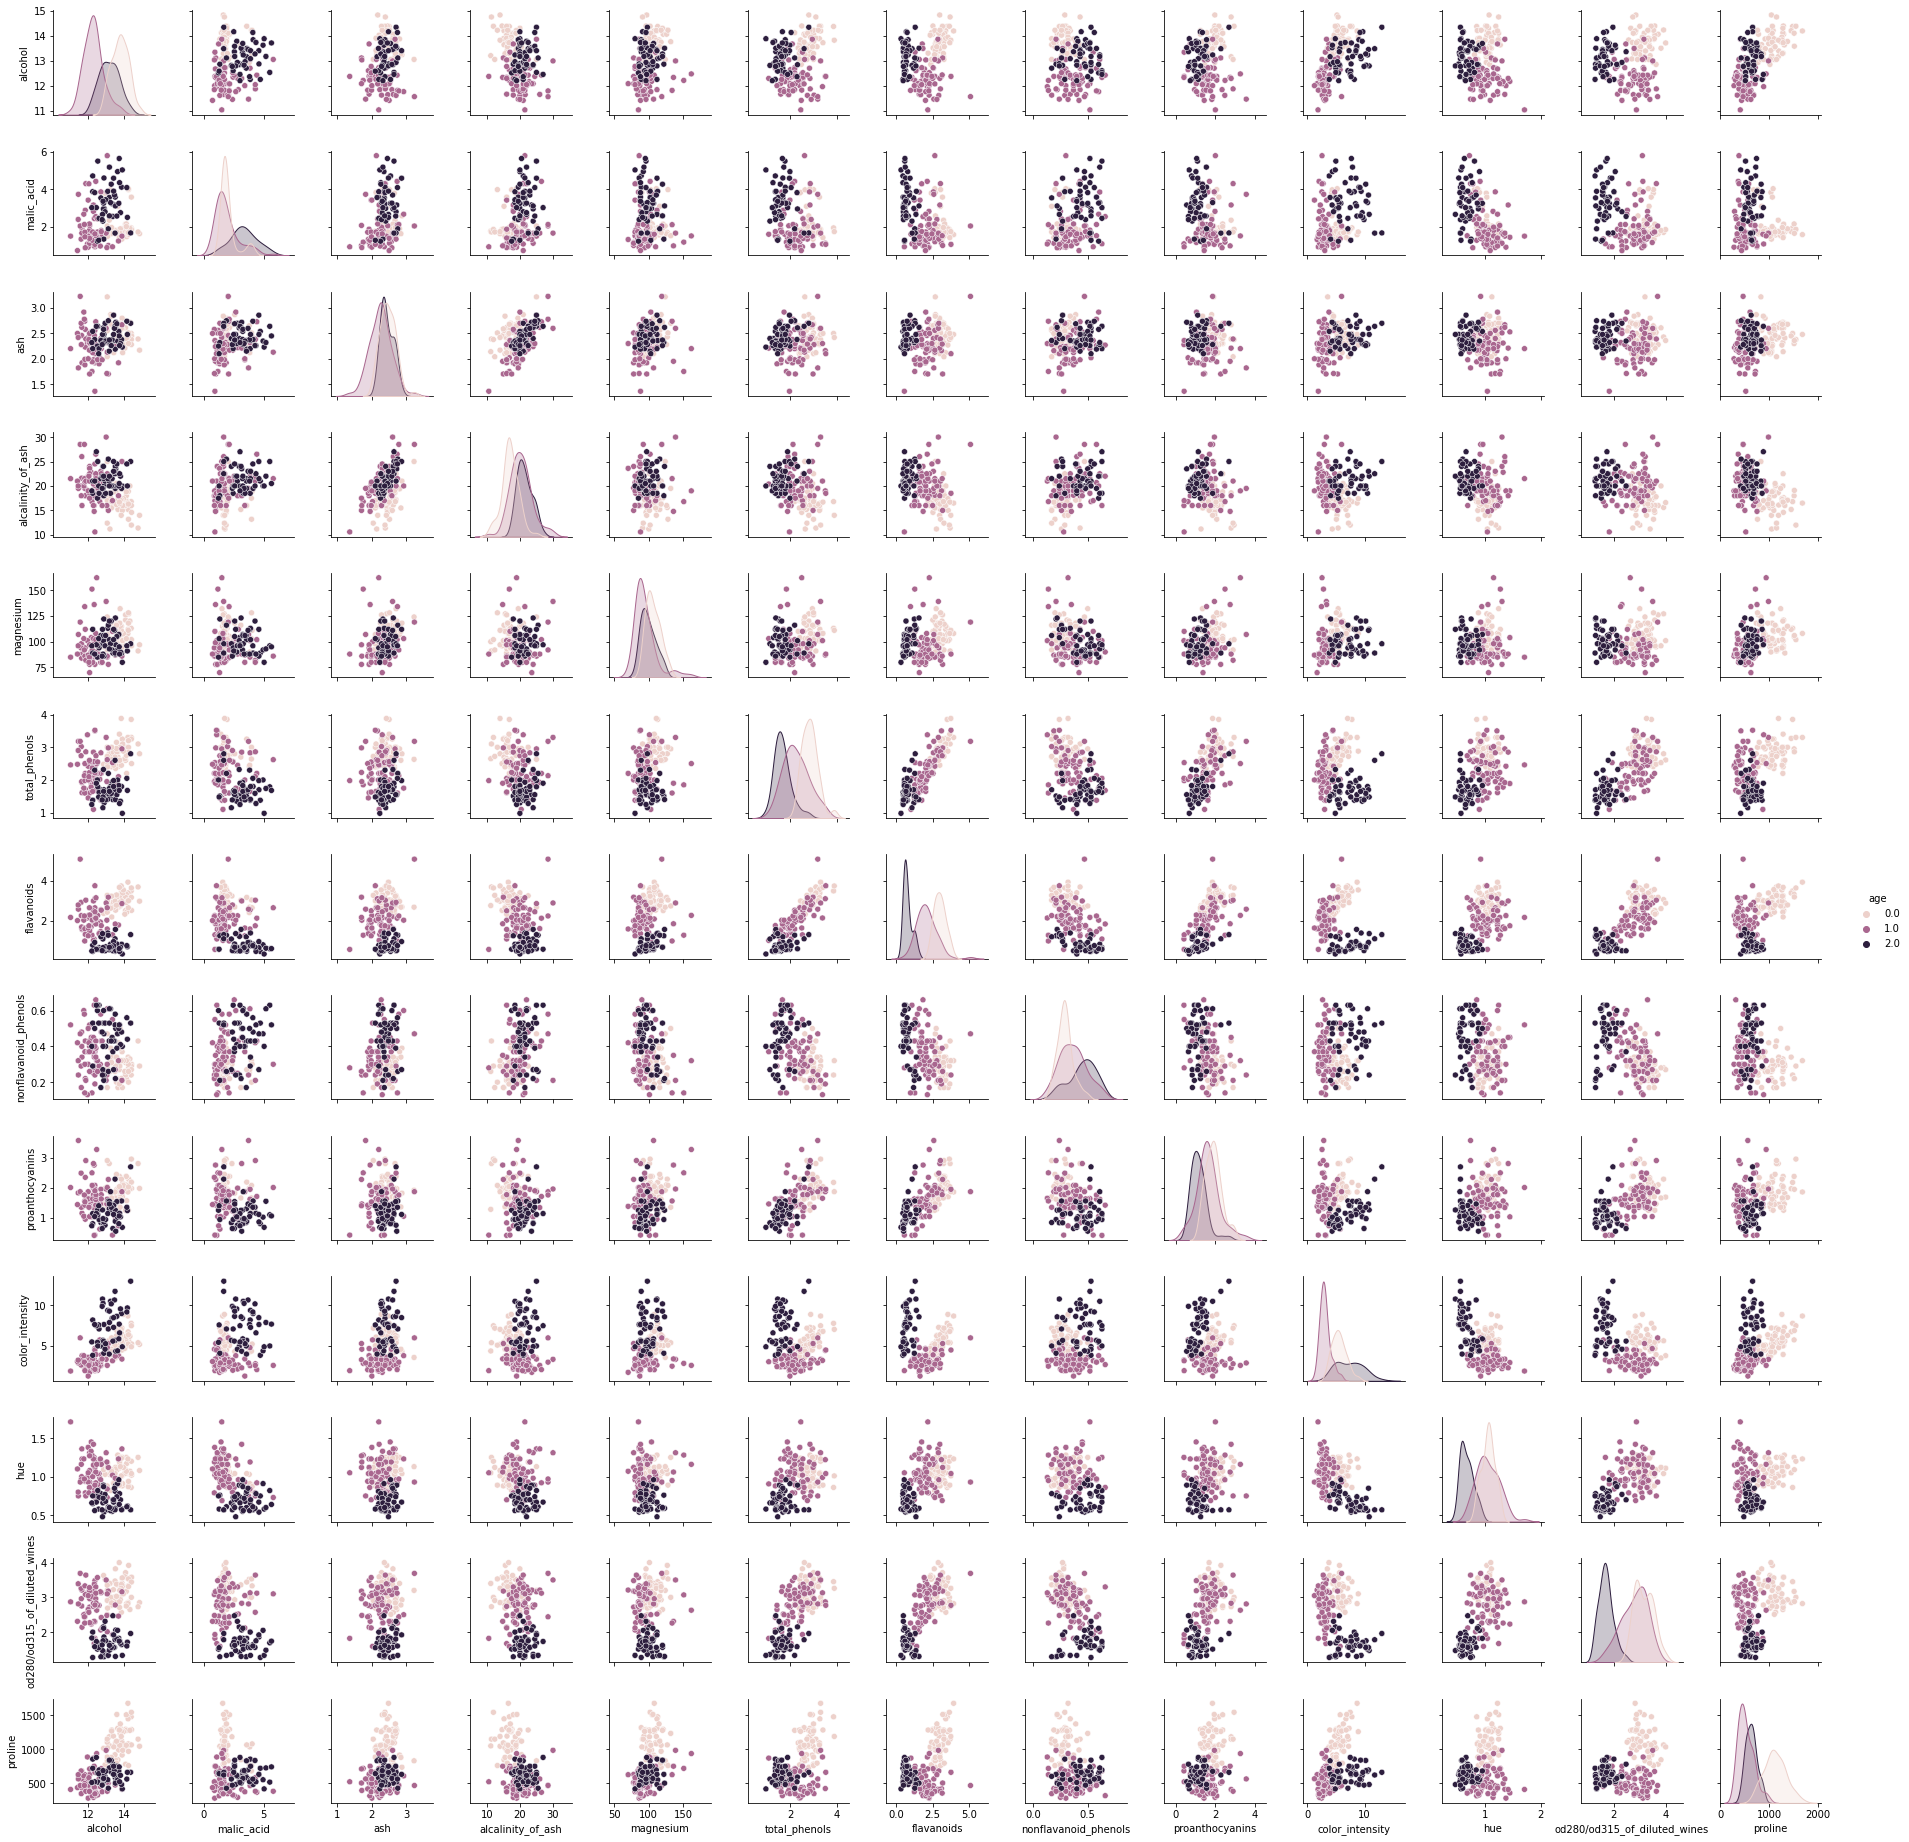

In [14]:
sns.pairplot(df_data, hue="age", height=2, diag_kind="kde") #使用 Seaborn 繪製：

# 關聯分析 (correlation map)

In [15]:
df_data[["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline",'age']]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,age
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


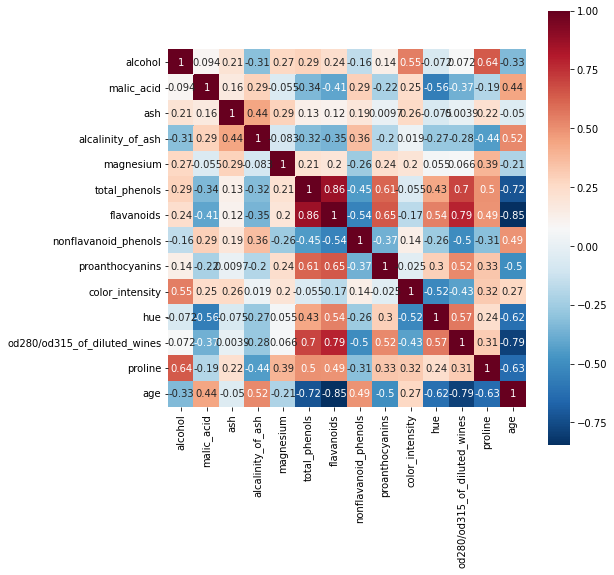

In [16]:
# correlation calculate
corr = df_data[["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline",'age']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


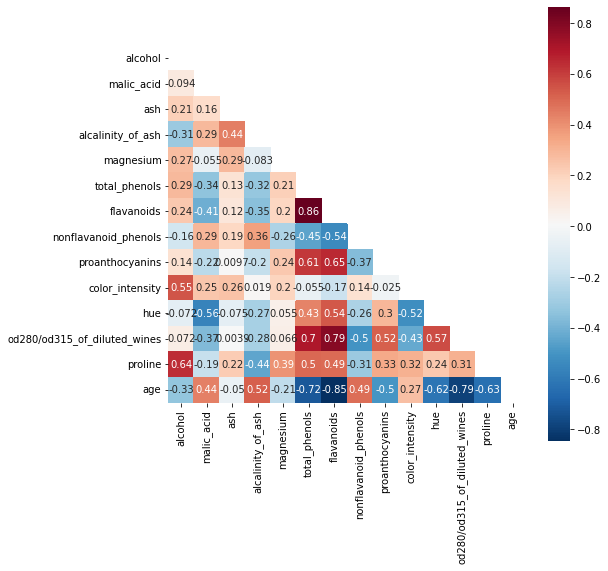

In [17]:
# correlation calculate
corr = df_data[["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline",'age']].corr()
# 將矩陣型簡化為對角矩陣型
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, mask=mask, cmap="RdBu_r") #center=0, cmap="YlGnBu"

# 散佈圖

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


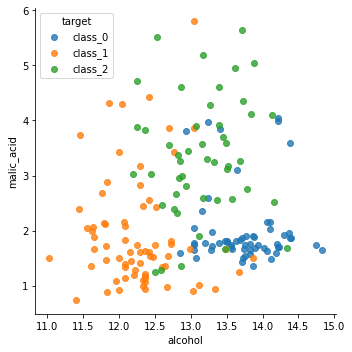

In [18]:
#"alcohol", "malic_acid"
sns.lmplot("alcohol", "malic_acid", hue='age', data=df_data, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['class_0', 'class_1', 'class_2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


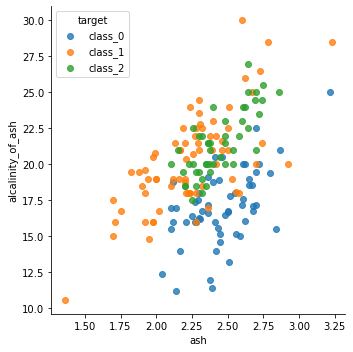

In [19]:
#"ash", "alcalinity_of_ash"
sns.lmplot("ash", "alcalinity_of_ash", hue='age', data=df_data, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['class_0', 'class_1', 'class_2'])

# 箱形圖
透過箱形圖可以分析每個特徵的分布狀況以及是否有離群值

Text(0.5, 1.0, 'age')

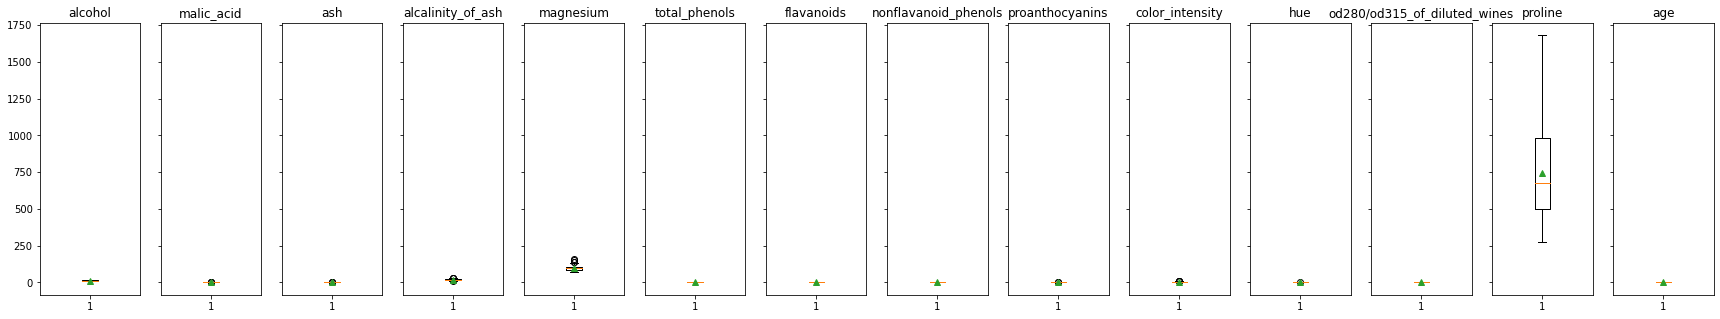

In [21]:
#1.num：图像编码或者名称，数字是编码，字符串是名称

#2.figsize：宽和高，单位是英尺

#3.dpi：指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80 

#4.facecolor：背景颜色

#5.edgecolor：边框颜色

#6.frameon：是否显示边框
fig, axes = plt.subplots(nrows=1, ncols=14, figsize=(30,5), sharey=True)
axes[0].boxplot(df_data["alcohol"],showmeans=True)
axes[0].set_title("alcohol")

axes[1].boxplot(df_data["malic_acid"],showmeans=True)
axes[1].set_title("malic_acid")

axes[2].boxplot(df_data["ash"],showmeans=True)
axes[2].set_title("ash")

axes[3].boxplot(df_data["alcalinity_of_ash"],showmeans=True)
axes[3].set_title("alcalinity_of_ash")

axes[4].boxplot(df_data["magnesium"],showmeans=True)
axes[4].set_title("magnesium")

axes[5].boxplot(df_data["total_phenols"],showmeans=True)
axes[5].set_title("total_phenols")

axes[6].boxplot(df_data["flavanoids"],showmeans=True)
axes[6].set_title("flavanoids")

axes[7].boxplot(df_data["nonflavanoid_phenols"],showmeans=True)
axes[7].set_title("nonflavanoid_phenols")

axes[8].boxplot(df_data["proanthocyanins"],showmeans=True)
axes[8].set_title("proanthocyanins")

axes[9].boxplot(df_data["color_intensity"],showmeans=True)
axes[9].set_title("color_intensity")

axes[10].boxplot(df_data["hue"],showmeans=True)
axes[10].set_title("hue")

axes[11].boxplot(df_data["od280/od315_of_diluted_wines"],showmeans=True)
axes[11].set_title("od280/od315_of_diluted_wines")

axes[12].boxplot(df_data["proline"],showmeans=True)
axes[12].set_title("proline")

axes[13].boxplot(df_data['age'],showmeans=True)
axes[13].set_title('age')